Matthew Eng - Data Science Capstone - Assignment 2

https://www.kaggle.com/datasets/samialyasin/insurance-data-personal-auto-line-of-business

### Imports/Reading the file

In [142]:
import pandas as pd
import numpy as np
from scipy.stats import permutation_test
from matplotlib import pyplot as plt
import seaborn as sns

In [143]:
df = pd.read_csv('synthetic_insurance_data.csv')

### Basic Analysis

In [144]:
df.columns

Index(['Age', 'Is_Senior', 'Marital_Status', 'Married_Premium_Discount',
       'Prior_Insurance', 'Prior_Insurance_Premium_Adjustment',
       'Claims_Frequency', 'Claims_Severity', 'Claims_Adjustment',
       'Policy_Type', 'Policy_Adjustment', 'Premium_Amount',
       'Safe_Driver_Discount', 'Multi_Policy_Discount', 'Bundling_Discount',
       'Total_Discounts', 'Source_of_Lead', 'Time_Since_First_Contact',
       'Conversion_Status', 'Website_Visits', 'Inquiries', 'Quotes_Requested',
       'Time_to_Conversion', 'Credit_Score', 'Premium_Adjustment_Credit',
       'Region', 'Premium_Adjustment_Region'],
      dtype='object')

In [145]:
df["Region"].unique()

array(['Suburban', 'Urban', 'Rural'], dtype=object)

In [146]:
df.head()

,Age,Is_Senior,Marital_Status,Married_Premium_Discount,Prior_Insurance,Prior_Insurance_Premium_Adjustment,Claims_Frequency,Claims_Severity,Claims_Adjustment,Policy_Type,...,Time_Since_First_Contact,Conversion_Status,Website_Visits,Inquiries,Quotes_Requested,Time_to_Conversion,Credit_Score,Premium_Adjustment_Credit,Region,Premium_Adjustment_Region
0,47,0,Married,86,1-5 years,50,0,Low,0,Full Coverage,...,10,0,5,1,2,99,704,-50,Suburban,50
1,37,0,Married,86,1-5 years,50,0,Low,0,Full Coverage,...,22,0,5,1,2,99,726,-50,Urban,100
2,49,0,Married,86,1-5 years,50,1,Low,50,Full Coverage,...,28,0,4,4,1,99,772,-50,Urban,100
3,62,1,Married,86,>5 years,0,1,Low,50,Full Coverage,...,4,1,6,2,2,2,809,-50,Urban,100
4,36,0,Single,0,>5 years,0,2,Low,100,Full Coverage,...,14,1,8,4,2,10,662,50,Suburban,50


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 27 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 10000 non-null  int64 
 1   Is_Senior                           10000 non-null  int64 
 2   Marital_Status                      10000 non-null  object
 3   Married_Premium_Discount            10000 non-null  int64 
 4   Prior_Insurance                     10000 non-null  object
 5   Prior_Insurance_Premium_Adjustment  10000 non-null  int64 
 6   Claims_Frequency                    10000 non-null  int64 
 7   Claims_Severity                     10000 non-null  object
 8   Claims_Adjustment                   10000 non-null  int64 
 9   Policy_Type                         10000 non-null  object
 10  Policy_Adjustment                   10000 non-null  int64 
 11  Premium_Amount                      10000 non-null  int

In [148]:
df.describe()

,Age,Is_Senior,Married_Premium_Discount,Prior_Insurance_Premium_Adjustment,Claims_Frequency,Claims_Adjustment,Policy_Adjustment,Premium_Amount,Safe_Driver_Discount,Multi_Policy_Discount,...,Total_Discounts,Time_Since_First_Contact,Conversion_Status,Website_Visits,Inquiries,Quotes_Requested,Time_to_Conversion,Credit_Score,Premium_Adjustment_Credit,Premium_Adjustment_Region
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,39.991700,0.159300,42.131400,47.625000,0.497200,36.780000,-79.860000,2219.571400,0.199900,0.305100,...,30.110000,15.478000,0.576700,5.022900,1.996900,1.996900,46.07320,714.253400,-11.320000,64.325000
std,14.050358,0.365974,42.993376,34.354438,0.716131,65.910288,97.955806,148.521132,0.399945,0.460473,...,33.689782,8.677975,0.494107,2.238231,1.415588,0.817409,45.44845,49.749487,48.704156,39.232618
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,1800.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.00000,530.000000,-50.000000,0.000000
25%,29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,2100.000000,0.000000,0.000000,...,0.000000,8.000000,0.000000,3.000000,1.000000,1.000000,6.00000,681.000000,-50.000000,50.000000
50%,39.000000,0.000000,0.000000,50.000000,0.000000,0.000000,0.000000,2236.000000,0.000000,0.000000,...,50.000000,16.000000,1.000000,5.000000,2.000000,2.000000,12.00000,715.000000,-50.000000,50.000000
75%,50.000000,0.000000,86.000000,50.000000,1.000000,50.000000,0.000000,2336.000000,0.000000,1.000000,...,50.000000,23.000000,1.000000,6.000000,3.000000,3.000000,99.00000,748.000000,50.000000,100.000000
max,90.000000,1.000000,86.000000,100.000000,5.000000,800.000000,0.000000,2936.000000,1.000000,1.000000,...,150.000000,30.000000,1.000000,16.000000,9.000000,3.000000,99.00000,850.000000,50.000000,100.000000


### Data Analysis

#### Null Hypothesis

The average frequency of insurance claims is the same for urban policyholders with a credit score >= 600 and rural policyholders with a credit score < 600

#### Alternative Hypothesis

The average frequency of insurance claims is different for urban policyholders with a credit score >= 600 and rural policyholders with a credit score < 600

Assumptions/Notes:
- Credit score >= 600 is considered fair/good
- Credit score < 600 is considered poor
- Urban is considered more dangerous and prone to accidents
- Rural is considered less dangerous and not prone to accidents
- Will be ignoring suburban policyholders
- significance level = 0.05 (commonly used value)

In [149]:
# filtered dataset to ignore unrelated columns
df_filtered = df[["Claims_Frequency", "Credit_Score", "Region"]]
df_filtered

,Claims_Frequency,Credit_Score,Region
0,0,704,Suburban
1,0,726,Urban
2,1,772,Urban
3,1,809,Urban
4,2,662,Suburban
...,...,...,...
9995,0,783,Urban
9996,0,667,Urban
9997,0,637,Urban
9998,0,676,Suburban


In [150]:
df_filtered.describe()

,Claims_Frequency,Credit_Score
count,10000.000000,10000.000000
mean,0.497200,714.253400
std,0.716131,49.749487
min,0.000000,530.000000
25%,0.000000,681.000000
50%,0.000000,715.000000
75%,1.000000,748.000000
max,5.000000,850.000000


In [151]:
# urban policyholders with "high" credit score
urban_high_credit = df_filtered[(df_filtered['Region'] == 'Urban') & (df_filtered['Credit_Score'] >= 600)]
urban_high_credit.head()

,Claims_Frequency,Credit_Score,Region
1,0,726,Urban
2,1,772,Urban
3,1,809,Urban
6,0,795,Urban
9,1,710,Urban


In [152]:
# rural policyholders with "low" credit score
rural_low_credit = df_filtered[(df_filtered['Region'] == 'Rural') & (df_filtered['Credit_Score'] < 600)]
rural_low_credit.head()

,Claims_Frequency,Credit_Score,Region
328,0,577,Rural
454,0,573,Rural
608,1,581,Rural
772,0,587,Rural
800,0,593,Rural


In [153]:
# claims frequency for urban and rural policyholders
urban_claims = urban_high_credit['Claims_Frequency']
rural_claims = rural_low_credit['Claims_Frequency']

#### Permutation Test

In [154]:
# function to calculate the difference in means between urban and rural policyholders
def mean_diff(x, y):
    return np.mean(x) - np.mean(y)

In [155]:
# Permutation Test
result = permutation_test((urban_claims, rural_claims), statistic=mean_diff, random_state=42)

print(f"Observed Difference/Statistic = {result.statistic:.4f}")
print(f"P-value = {result.pvalue:.4f}")

Observed Difference/Statistic = 0.1480
P-value = 0.4500


In [156]:
# Final Decision
if result.pvalue < 0.05:
    print("We reject the null hypothesis -> claims frequency does differ")
else:
    print("We can't reject the null hypothesis -> no evidence to show that claims frequency differs")

We can't reject the null hypothesis -> no evidence to show that claims frequency differs


### Visualizations

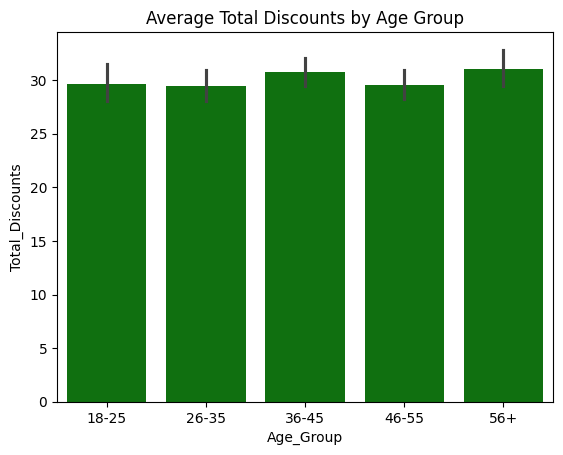

In [157]:
# bar plot comparing the average total discounts between different age groups
age_bins = [18, 25, 35, 45, 55, 100]
age_labels = ['18-25', '26-35', '36-45', '46-55', '56+']
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False) # AI helped generate this line


sns.barplot(x='Age_Group', y='Total_Discounts', data=df, color='green')
plt.title("Average Total Discounts by Age Group")
plt.show()

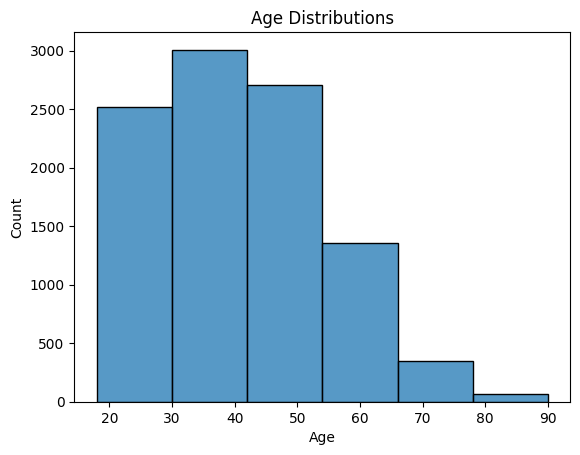

In [158]:
# histogram displaying the dstributions of the different ages
sns.histplot(df["Age"], bins=6, kde=False)
plt.title("Age Distributions")
plt.show()

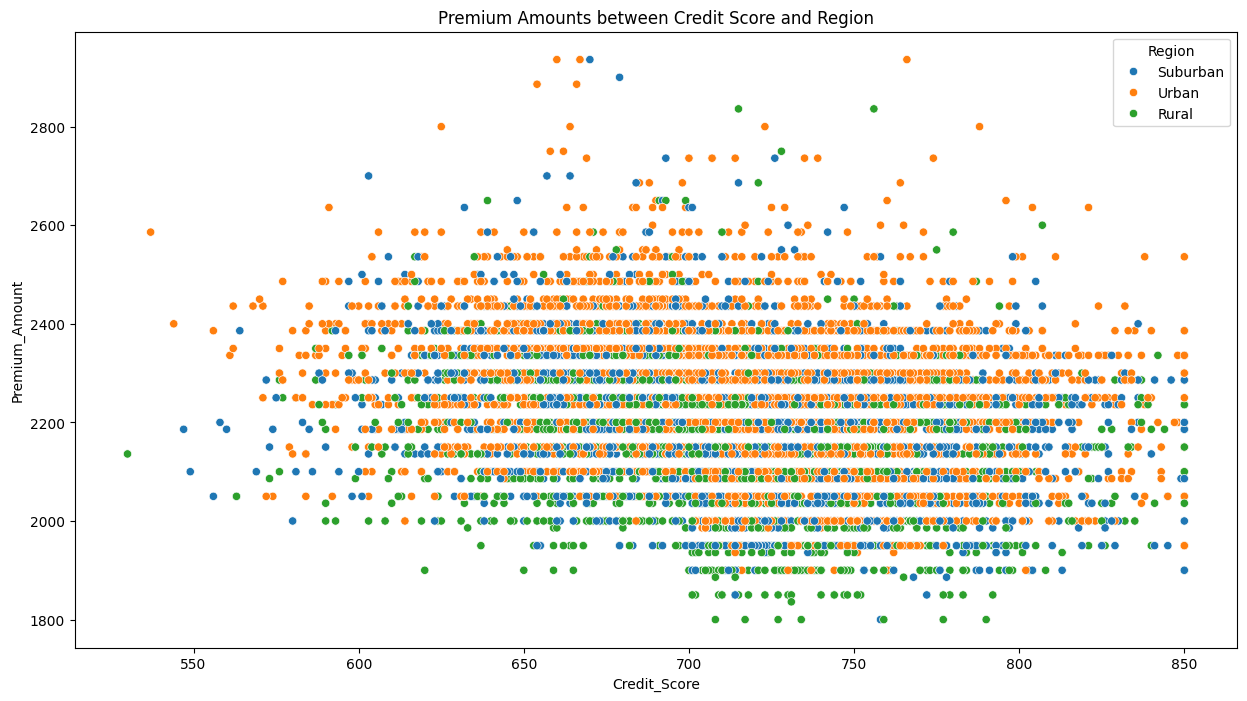

In [159]:
# scatterplot comparing premium amounts between different credit scores and regions
plt.figure(figsize=(15, 8))
sns.scatterplot(x="Credit_Score", y="Premium_Amount", hue="Region", data=df)
plt.title("Premium Amounts between Credit Score and Region")
plt.show()